## Linear Regression Coefficients
This program calculates the linear regression coefficients for comment scores. It could provide some way of evaluating response topics in the future.

In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

from mlxtend.plotting import plot_linear_regression

# Import utility files
from utils import read_df, remove_links,remove_comments, clean_sentence, save_object, load_object, make_clustering_objects, weeks_since, stopless_text_generator, months_since, clean_id

from pprint import pprint

In [8]:
import os
directories = ['objects', 'models', 'clusters', 'matricies', 'excels']
for dirname in directories:
    if not os.path.exists(dirname):
        os.makedirs(dirname)

In [9]:
model_name = "2019_SW_PandC"
num_word_clusters = 100

In [10]:
CommentsByClusters = load_object('matricies/', model_name + "-CommentsByClusters-" + str(num_word_clusters) + 'clusters')

In [11]:
#Make comment by score matrix
CommentsByScore = load_object('matricies/', model_name + "-CommentsByScore-" + str(num_word_clusters) + 'clusters')

In [12]:
CommentsByClusters.shape

(376604, 100)

In [13]:
CommentsByScore.shape

(376604, 1)

In [14]:
#Add column on just 1s to CommentByClusters for B0 value
n,m = CommentsByClusters.shape 
X0 = np.ones((n,1))
CommentsByClustersOnes = np.hstack((X0, CommentsByClusters))
CommentsByClustersOnes.shape

(376604, 101)

In [15]:
coeffs = np.linalg.pinv(CommentsByClustersOnes).dot(CommentsByScore)

In [16]:
coeffs.shape

[[ 1.37990426e+00]
 [ 3.85280164e-02]
 [-2.55944866e-03]
 [ 1.18932233e-01]
 [ 4.25926734e-02]
 [ 1.22435943e-02]
 [-2.86519302e-02]
 [ 7.42431481e-02]
 [-1.82667639e-01]
 [-4.87827449e-01]
 [-2.45522761e-02]
 [-1.69687323e-02]
 [ 4.44423023e-02]
 [ 7.70727620e-02]
 [-1.20304055e-02]
 [-4.44450180e-02]
 [ 1.00219693e-02]
 [ 6.74439027e-03]
 [-1.14186008e-02]
 [ 1.30280313e-03]
 [-7.92508241e-02]
 [-4.13280380e-02]
 [ 1.70892636e-02]
 [ 8.44804170e-02]
 [ 2.54454519e+00]
 [ 6.31970733e-03]
 [-4.29764512e-02]
 [ 9.96414662e-02]
 [ 2.98344551e-02]
 [ 5.22733803e-02]
 [-2.13805213e-01]
 [ 1.00552090e-01]
 [ 3.21182017e-03]
 [ 4.48282414e-02]
 [-1.72569995e-02]
 [ 9.36541876e-02]
 [-2.57549454e-01]
 [-1.71610635e-02]
 [-1.83965289e-03]
 [-8.94404745e-02]
 [ 5.10922159e-02]
 [-2.47903766e-02]
 [ 1.98226074e-02]
 [ 1.18244398e-01]
 [ 8.63487390e-03]
 [ 2.78103743e-02]
 [ 5.59119063e-03]
 [-6.68854837e-03]
 [-5.02403640e-01]
 [-7.86701027e-03]
 [ 5.20755870e-02]
 [-1.75218717e-03]
 [-1.6405656

(101, 1)

In [74]:
coefflist = []
for item in coeffs.tolist():
    for coeff in item:
        coefflist.append(coeff)

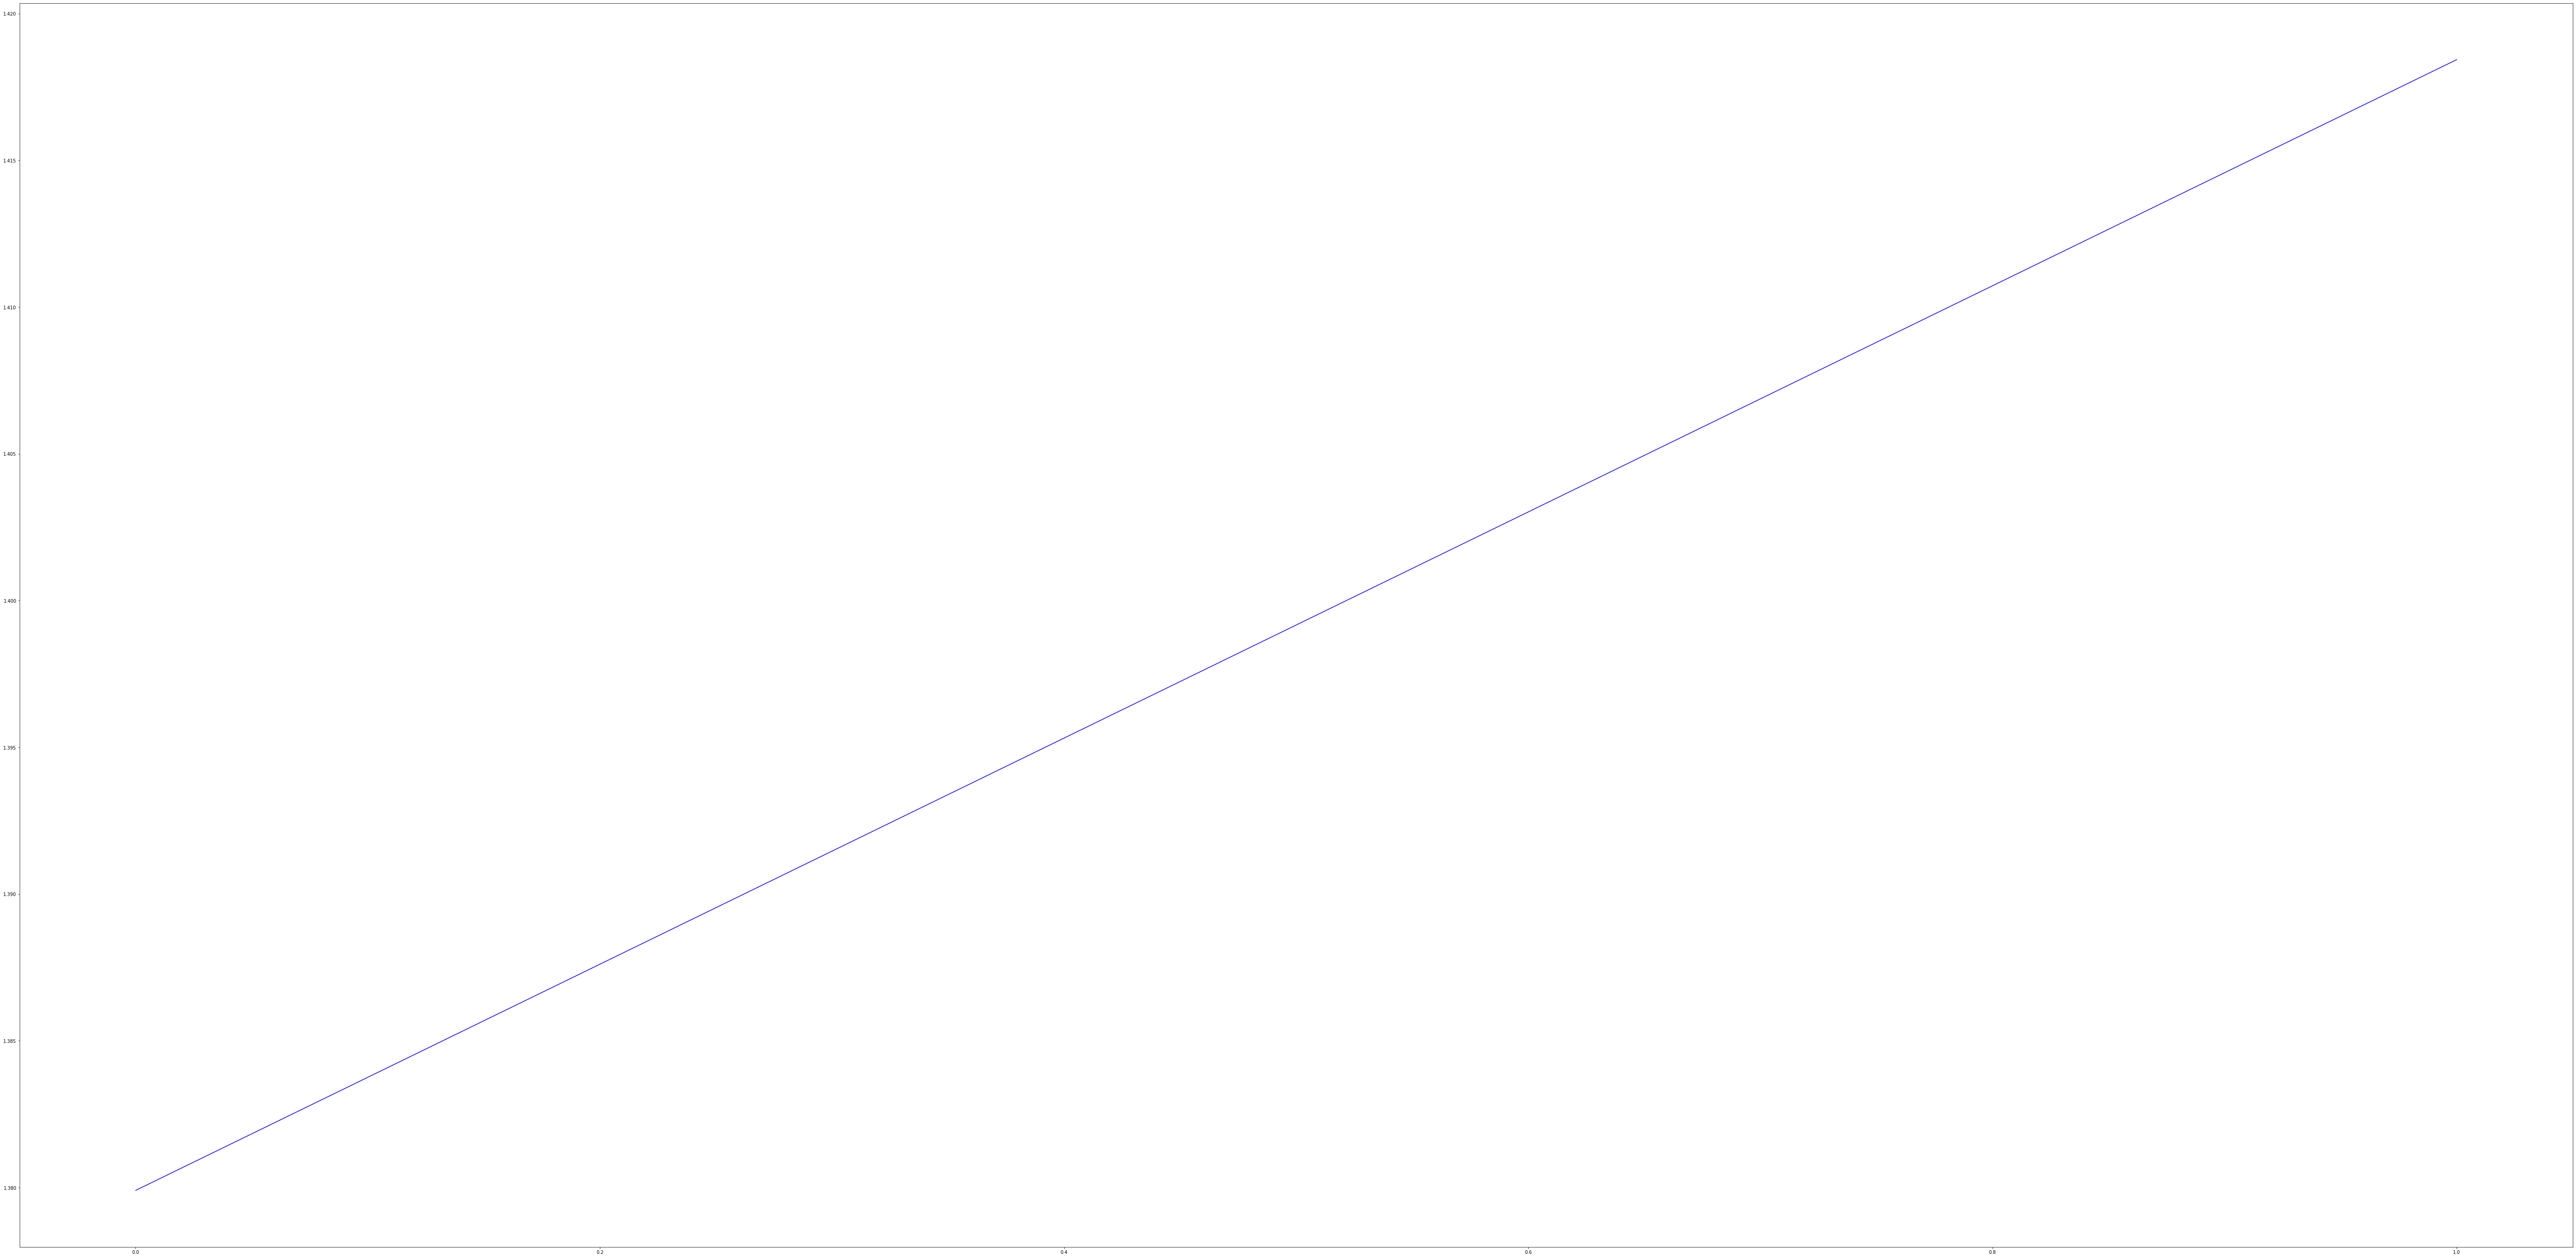

In [79]:
# Find regression line
xx = np.linspace(0, 1, 2)
yy = np.array(coeffs[0] + coeffs[1] * xx)

# Plot data, regression line
plt.figure(1)
plt.plot(xx, yy.T, color='b')
plt.show()

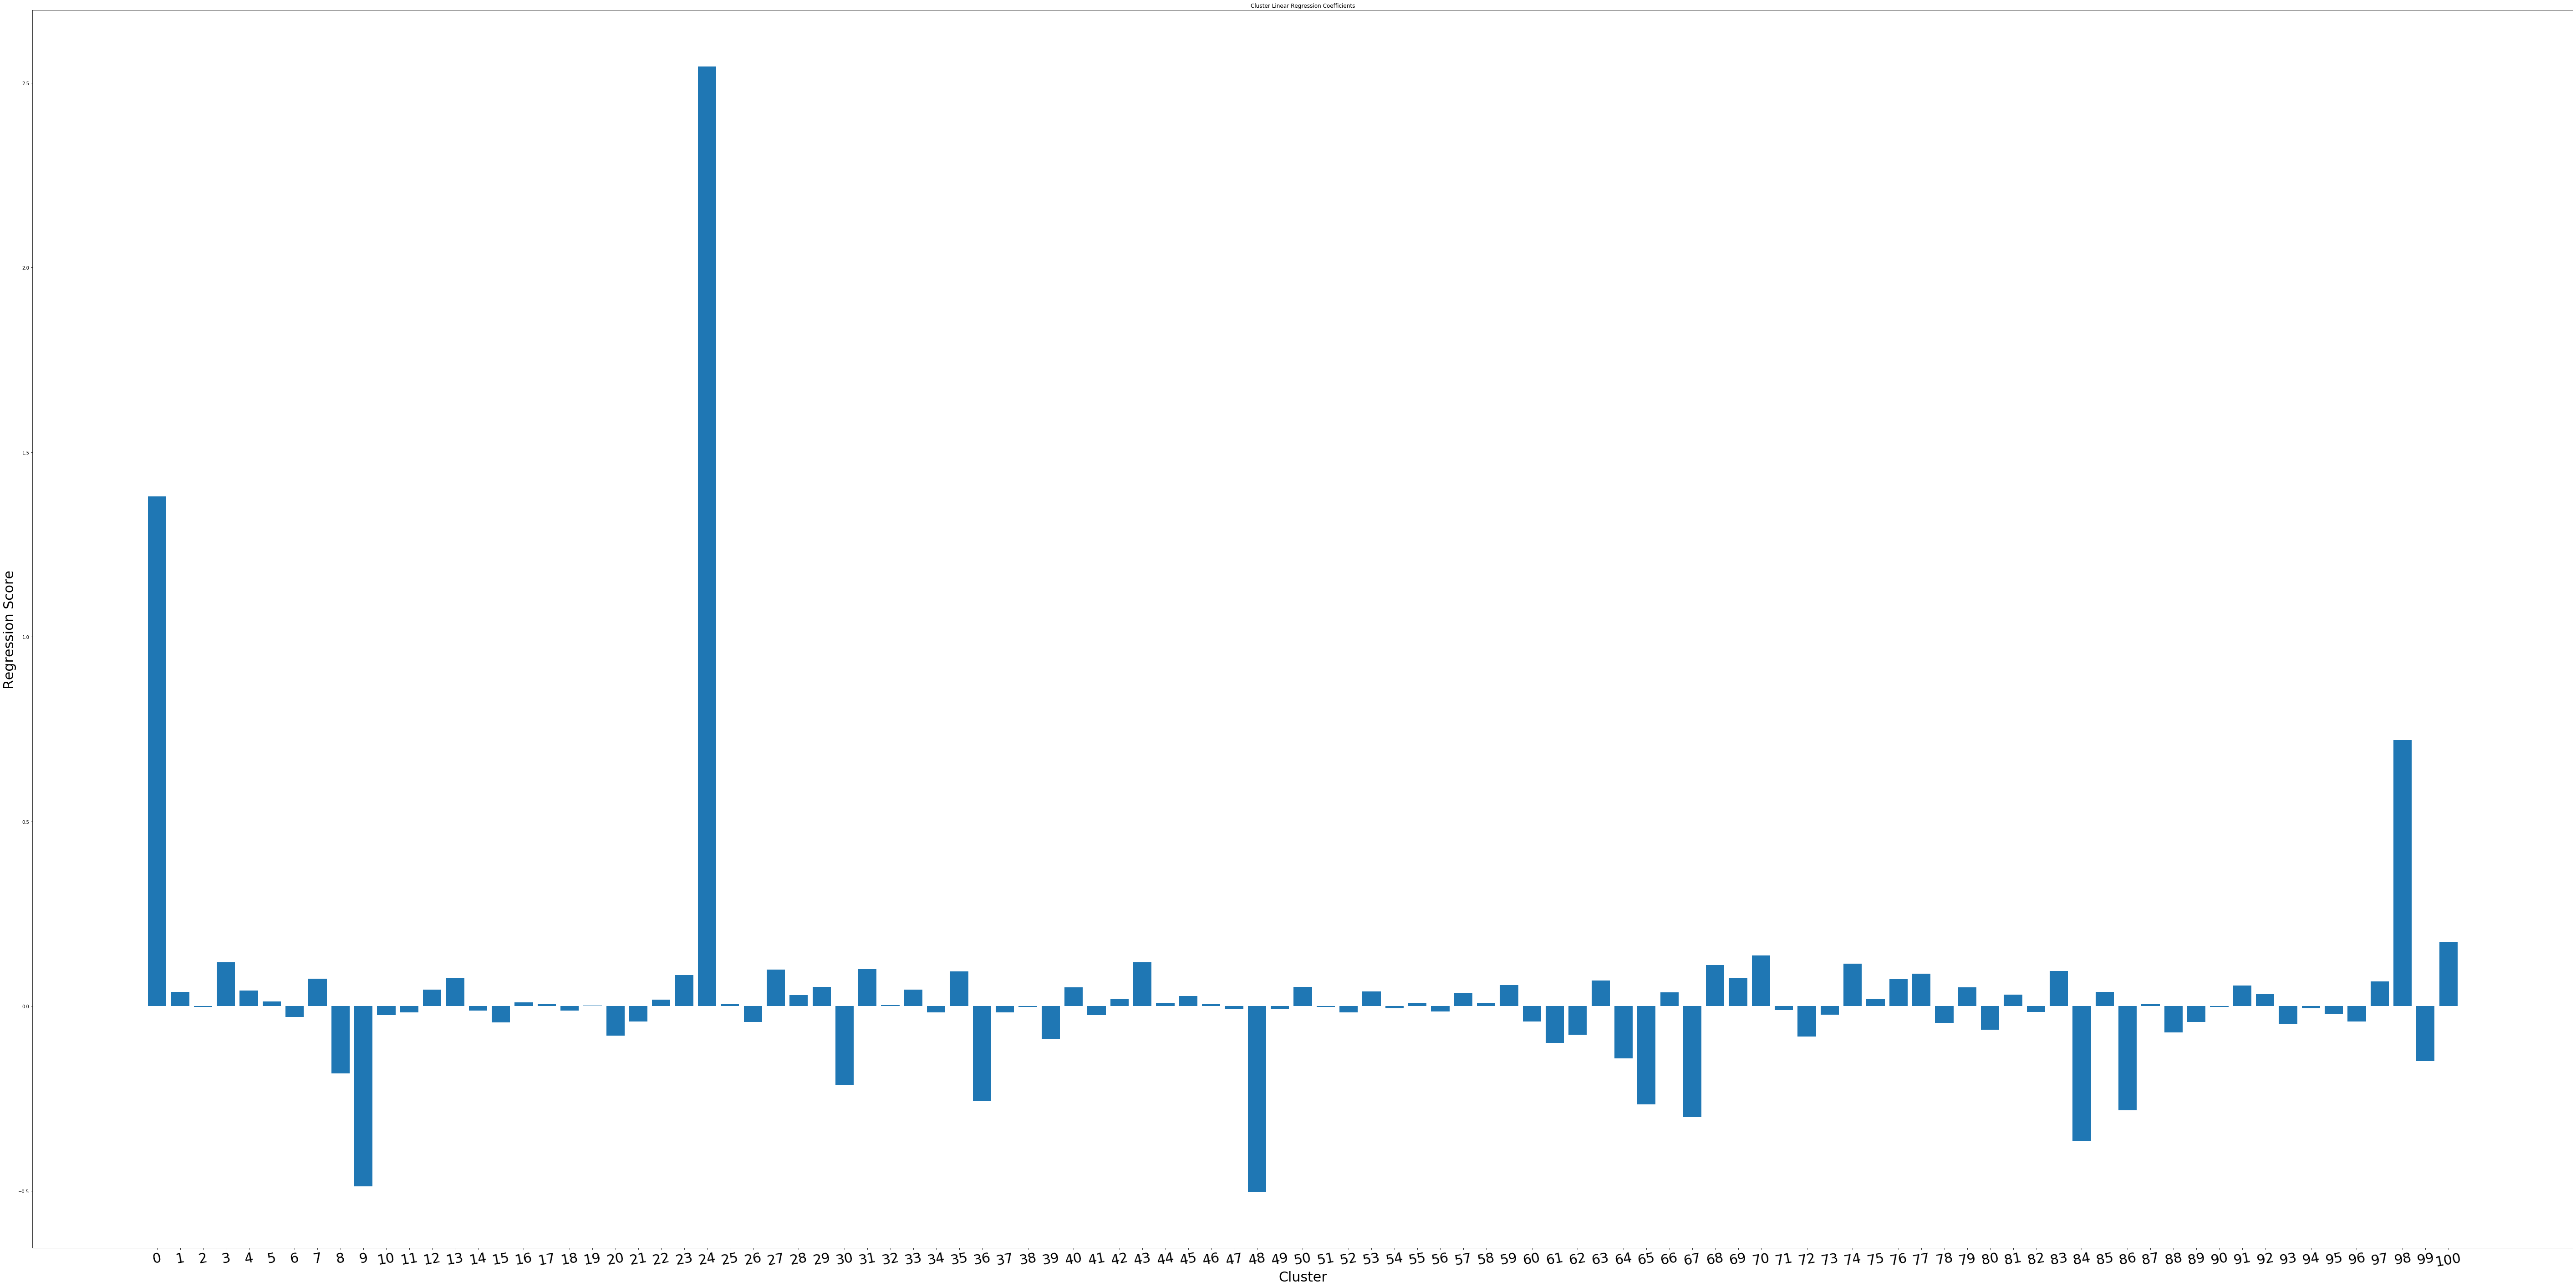

In [66]:
#Plot coefficient value for each cluster
index = np.arange(len(coefflist))
plt.bar(index, coefflist)
plt.xlabel('Cluster', fontsize=30)
plt.ylabel('Regression Score', fontsize=30)
plt.xticks(index, fontsize=30, rotation=10)
plt.title('Cluster Linear Regression Coefficients')
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

In [19]:
save_object(coeffs,'matricies/', model_name + "-CoeffsByClusters-"+str(num_word_clusters)+'clusters')